In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('filmtv_movies.csv')
print(df.head())

Saving filmtv_movies.csv to filmtv_movies (4).csv
   filmtv_id                                        title  year      genre  \
0          2  Bugs Bunny's Third Movie: 1001 Rabbit Tales  1982  Animation   
1          3                    18 anni tra una settimana  1991      Drama   
2         17                             Ride a Wild Pony  1976   Romantic   
3         18                                        Diner  1982     Comedy   
4         20              A che servono questi quattrini?  1942     Comedy   

   duration        country                             directors  \
0        76  United States  David Detiege, Art Davis, Bill Perez   
1        98          Italy                         Luigi Perelli   
2        91  United States                           Don Chaffey   
3        95  United States                        Barry Levinson   
4        85          Italy                        Esodo Pratelli   

                                              actors  avg_vote  critics_

In [45]:
df.dropna(subset=['genre', 'directors', 'actors'], inplace=True)

df['combined_features'] = df['genre'] + ' ' + df['directors'] + ' ' + df['actors']

In [46]:

df = pd.read_csv("filmtv_movies.csv")
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (41399, 19)

Columns: Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'critics_vote', 'public_vote',
       'total_votes', 'description', 'notes', 'humor', 'rhythm', 'effort',
       'tension', 'erotism'],
      dtype='object')

Missing values:
 filmtv_id           0
title               0
year                0
genre              95
duration            0
country            10
directors          34
actors           2127
avg_vote            0
critics_vote     4696
public_vote       194
total_votes         0
description      1542
notes           22602
humor               0
rhythm              0
effort              0
tension             0
erotism             0
dtype: int64


In [47]:
df = df.dropna(subset=['avg_vote'])


In [48]:
df = pd.read_csv("filmtv_movies.csv")
df['genre'] = df['genre'].fillna('Unknown')
df['directors'] = df['directors'].fillna('Unknown')
df['actors'] = df['actors'].fillna('Unknown')

In [49]:
X = df[['genre', 'directors', 'actors', 'year', 'duration', 'avg_vote']]
y = df['total_votes']


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
df = pd.read_csv("filmtv_movies.csv")
categorical_features = ['genre', 'directors', 'actors']
numeric_features = ['year', 'duration', 'avg_vote']

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, random_state=42))
])

In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, random_state=42))
])

lasso_model.fit(X_train, y_train)


y_pred = lasso_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [55]:

print("\n Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")



 Model Evaluation:
Mean Absolute Error (MAE): 35.080
Root Mean Squared Error (RMSE): 58.992
R² Score: 0.201


In [56]:
import pandas as pd

mean_avg_vote = X_train['avg_vote'].mean()

new_movie = pd.DataFrame({
    'genre': ['Action'],
    'directors': ['Christopher Nolan'],
    'actors': ['Christian Bale, Michael Caine, Tom Hardy'],
    'year': [2025],
    'duration': [150],
    'avg_vote': [mean_avg_vote]
})


In [57]:
new_movie_reordered = new_movie[X_train.columns]
predicted_rating = lasso_model.predict(new_movie_reordered)
print("\n Predicted rating for new movie:", round(predicted_rating[0], 2))


 Predicted rating for new movie: 136.36


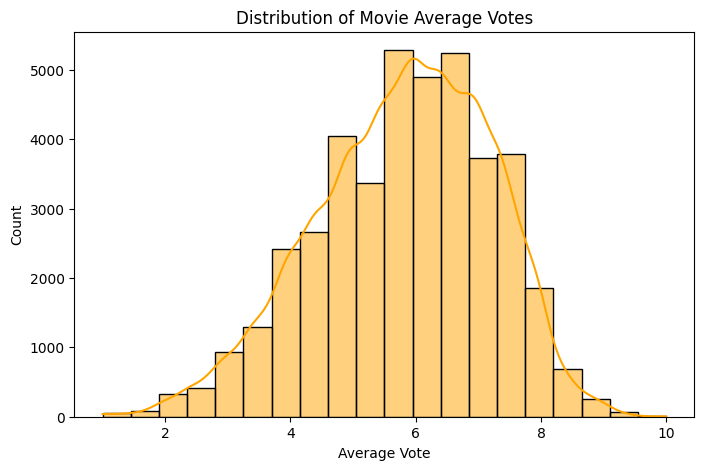

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['avg_vote'], bins=20, kde=True, color='orange')
plt.title("Distribution of Movie Average Votes")
plt.xlabel("Average Vote")
plt.ylabel("Count")
plt.show()

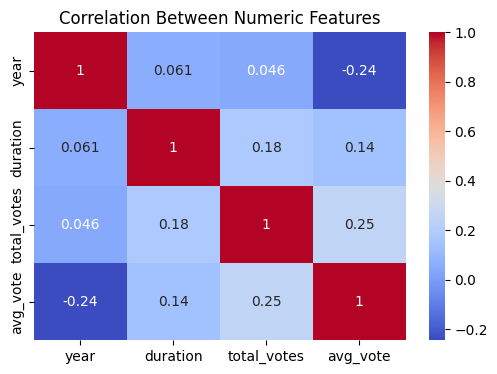

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['year', 'duration', 'total_votes', 'avg_vote']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()